# Práctica 1 (P1): Búsqueda en espacios de estados

<center><h3>
    Fernando Fraile Mulas
</h3></center>

## 1. Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**.

* Para ejecutar una celda de código, selecciónala y pulsa el botón **"▶ Run"** de la barra de herramientas.

* Para pasar el documento a HTML, selecciona **"File > Download as > HTML (.html)"**.

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada para cada grupo en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Busqueda.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Busqueda.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Busqueda.ipynb`: Archivo fuente Jupyter Notebook. 

## 2. Bloque P1.0

## Introducción a AIMA-Python


El libro de consulta de referencia para esta práctica es el **"Artificial Intelligence: A Modern Approach."** (conocido como AIMA http://aima.cs.berkeley.edu/) de Russell y Norvig. En particular, el capítulo 3 ofrece una panorámica completa sobre técnicas clásicas de resolución de problemas basadas en búsqueda en espacios de estados. 

El libro viene acompañado de material suplementario en forma de un conjunto de módulos Python que implementan muchos de los algoritmos presentados. Es por ello, que en la medida de lo posible utilizaremos sus implementaciones, que originalmente pueden consultarse en el repositorio de AIMA-Python https://github.com/aimacode/aima-python, y de los que hemos realizado una adaptación a las necesidades de nuestra Asignatura en este boletín.

Para trabajar con los algoritmos de búsqueda relevantes, primero nos familiarizaremos con las clases y funciones clave que nos permitirán resolver problemas mediante estrategias de búsqueda vistas en las sesiones expositivas. Para esto, trabajaremos con un problema bien conocido, el 8-puzzle, realizando pequeñas modificaciones al código existente para incorporar y estudiar el comportamiento de las heurísticas consideradas. Finalmente, se os pedirá que implementéis completamente una solución al problema del Viajante de Comercio y estudieis las heurísticas que implementéis.

Si tienes dudas sobre cómo crear y manipular clases en Python, revisa los tutoriales de P0.

**¡Empecemos!**

En primer lugar, importa los módulos Python especialmente preparados para esta Práctica.

In [1]:
# contiene algoritmos de búsqueda implementado en AIMA
from search_mod import *

# algunas funciones auxiliares
from helpers_mod import *

Puedes consultar el código de algunas clases y funciones clave mediante el uso de `psource(symbol)`. Por ejemplo, `psource(Problem)` mostrará el código de la clase Problem, **si Cell Type es Code**. 

In [15]:
 psource(Problem)

Esta clase es fundamental pues, como mostraremos más abajo, se trata de una clase abstracta que puede extenderse para implementar la resolución de problemas concretos en base a los siguientes métodos:
- actions(state): devuelve una lista de operadores o acciones que son aplicables al estado actual
- result(state, action): devuelve el nuevo estado resultante de aplicar la acción **action** al estado **state**
- is_goal(state): devuelve cierto (True) si se ha alcanzando el estado meta u objetivo **state**
- action_cost(s, a, s1): calcula el coste de aplicar la acción a para pasar del estado s al s1
- h(node): función heurística que se emplea en estrategias informadas

Cabe destacar que las estrategias de búsqueda se basan en búsquedas sobre grafos/árboles, y por lo tanto los algoritmos usados manejan nodos, que mantienen la relación entre los mismos, el coste del camino, y el estado que el nodo debe representar. De ahí, la clase `Node` tiene los atributos `state, parent, action, path_cost`.

Empieza por inspeccionar el código de las clases/funciones: `breadth_first_search, best_first_search, astar_search, expand, g, Problem, Node`.

In [11]:
psource(Problem)
psource(Node)
psource(breadth_first_search)
psource(best_first_search)
psource(astar_search)
psource(expand)
psource(g)

❓ **Pregunta 1**.

- 1.1) Fíjate en las implementaciones de `breadth_first_search` y `best_first_search`. Puedes observar que en ambas existe un bucle para explorar un conjunto de nodos que llama frontera (nodos pendientes), y expande el nodo para producir los sucesores (nodos-hijo). Ahora indica las diferencias y explica cómo crees que esas diferencias determinan el comportamiento de sendas estrategias de búsqueda. **Pista**: Fíjate en la estructura de datos para los nodos frontera. 

- 1.2) En la implementación disponible de la estrategia A* (`astar_search`), ¿qué calcula la función g(n)?


## 3. Bloque P1.1


## El problema del 8-Puzzle



![](https://ece.uwaterloo.ca/~dwharder/aads/Algorithms/N_puzzles/images/puz3.png)

El problema del 8-puzzle se plantea como un tablero 3x3 que contiene ocho fichas numeradas que se
pueden mover gracias a que una de las posiciones contiene un espacio en blanco o hueco. El objetivo
del juego es alcanzar el estado meta u objetivo indicado partiendo de un estado inicial dado, limitándose a
realizar movimientos permitidos del blanco. Una solución, entendida como un proceso de resolución, viene dada
por la secuencia de acciones o pasos que permiten alcanzar el estado meta.

Este problema forma parte de la familia de puzzles o rompecabezas de piezas deslizantes, que
pertenecen a la categoría de problemas NP. Tableros con mayor número de fichas puede hacer su resolución impracticable. Aun así, el 8-puzzle es útil para probar algoritmos que implementen estrategias de búsqueda como los que utilizarás en esta práctica pues se puede resolver en unos milisegundos a pesar de los 9!/2=181440 estados alcanzables.

La clase `Problem` puede extenderse para resolver problemas particulares.

La siguiente implementación permite usar los algoritmos de búsqueda que vienen implementados en AIMA-Python para resolver el problema del 8-puzzle.

In [2]:
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board,
    where one of the squares is a blank, trying to reach a goal configuration.
    A board state is represented as a tuple of length 9, where the element at index i 
    represents the tile number at index i, or 0 for the empty square, e.g. the goal:
        1 2 3
        4 5 6 ==> (1, 2, 3, 4, 5, 6, 7, 8, 0)
        7 8 _
        
    or the goal:
        1 2 3
        8 _ 4 ==> (1, 2, 3, 8, 0, 4, 7, 6, 5)
        7 6 5
    """

    def __init__(self, initial, goal=(1, 2, 3, 4, 5, 6, 7, 8, 0)):
        assert inversions(initial) % 2 == inversions(goal) % 2 # Parity check (feasible solution ?)
        self.initial, self.goal = initial, goal
    
    def actions(self, state):
        """The indexes of the squares that the blank can move to."""
        moves = ((1, 3),    (0, 2, 4),    (1, 5),
                 (0, 4, 6), (1, 3, 5, 7), (2, 4, 8),
                 (3, 7),    (4, 6, 8),    (7, 5))
        blank = state.index(0)
        return moves[blank]
    
    def result(self, state, action):
        """Swap the blank with the square numbered `action`."""
        s = list(state)
        blank = state.index(0)
        s[action], s[blank] = s[blank], s[action]
        return tuple(s)
    
    def h1(self, node):
        """The misplaced tiles heuristic."""
        return hamming_distance(node.state, self.goal)
    
    def h2(self, node):
        """The Manhattan heuristic."""
        X = (0, 1, 2, 0, 1, 2, 0, 1, 2)
        Y = (0, 0, 0, 1, 1, 1, 2, 2, 2)
        return sum(abs(X[s] - X[g]) + abs(Y[s] - Y[g])
                   for (s, g) in zip(node.state, self.goal) if s != 0)    
    
    def h(self, node): return self.h2(node)
    
    
def hamming_distance(A, B):
    "Number of positions where vectors A and B are different."
    return sum(a != b for a, b in zip(A, B))
    

def inversions(board):
    "The number of times a piece is a smaller number than a following piece."
    return sum((a > b and a != 0 and b != 0) for (a, b) in combinations(board, 2))
    
    
def board8(board, fmt=(3 * '{} {} {}\n')):
    "A string representing an 8-puzzle board"
    return fmt.format(*board).replace('0', '_')



In [3]:
class Board(defaultdict):
    empty = '.'
    off = '#'
    def __init__(self, board=None, width=8, height=8, to_move=None, **kwds):
        if board is not None:
            self.update(board)
            self.width, self.height = (board.width, board.height) 
        else:
            self.width, self.height = (width, height)
        self.to_move = to_move

    def __missing__(self, key):
        x, y = key
        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            return self.off
        else:
            return self.empty
        
    def __repr__(self):
        def row(y): return ' '.join(self[x, y] for x in range(self.width))
        return '\n'.join(row(y) for y in range(self.height))
            
    def __hash__(self): 
        return hash(tuple(sorted(self.items()))) + hash(self.to_move)

Puedes crear instancias de problemas del 8-Puzzle de la siguiente forma:

In [4]:
# Ejemplos de creación de instancias del problema del 8-puzzle
e1 = EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8))
e2 = EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0))
e3 = EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6))
e4 = EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1))
e5 = EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1))
e6 = EightPuzzle((1, 5, 2, 4, 0, 3, 6, 7, 8))

y puedes proceder a resolver el problema mediante las estrategias de búsqueda A* o breatdh_first (retorna el Node correspondiente al estado solución):

In [28]:
# resolver una instancia particular con una estrategia de búsqueda concreta
# retorna la solución, como una instancia de Node
print(f'Resolver el problema {e2} con A*')
sol1 = astar_search(e2)
print ("Nodo solución (A*): ", sol1)

print(f'Resolver el problema {e2} con breadth_first_search')
sol2 = breadth_first_search(e2)
print ("Nodo solución (breadth_first_search): ", sol2)

Resolver el problema EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con A*
Nodo solución (A*):  <(0, 1, 2, 3, 4, 5, 6, 7, 8)>
Resolver el problema EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con breadth_first_search
Nodo solución (breadth_first_search):  <(0, 1, 2, 3, 4, 5, 6, 7, 8)>


Para este problema, como el nodo de la solución es sencillamente el nodo meta, y éste era una entrada al problema, no resulta muy informativo. Sin embargo, puedes consultar los atributos de dicho nodo e incluso obtener los movimientos que condujeron al estado objetivo desde el estado inicial. 

Veamos cómo puedes obtener esta información.

In [29]:
# imprimir informacion relevante utilizando los atributos y funciones siguientes
print ('sol1: A*')
print (f'Coste del camino: {sol1.path_cost:d}')
print (f'Estado solución: {sol1.state:}')
print (f'Estado solución (tablero):')
print (board8(sol1.state))
print (f'Lista de acciones: {path_actions(sol1)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol1))}')
print (f'Lista de estados:')
print (path_states(sol1))

# lista de estados formateado
for s in path_states(sol1):
    print(board8(s))
    
print (' ')
print ('sol2: breadth_first_search')
print (f'Coste del camino: {sol2.path_cost:d}')
print (f'Estado solución: {sol2.state:}')
print (f'Estado solución (tablero):')
print (board8(sol2.state))
print (f'Lista de acciones: {path_actions(sol2)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol2))}')
print (f'Lista de estados:')
print (path_states(sol2))

# lista de estados formateado
for s in path_states(sol2):
    print(board8(s))

sol1: A*
Coste del camino: 22
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Estado solución (tablero):
_ 1 2
3 4 5
6 7 8

Lista de acciones: [5, 4, 3, 6, 7, 8, 5, 2, 1, 4, 7, 6, 3, 4, 5, 8, 7, 6, 3, 4, 1, 0]
Numero de acciones en el camino: 22
Lista de estados:
[(1, 2, 3, 4, 5, 6, 7, 8, 0), (1, 2, 3, 4, 5, 0, 7, 8, 6), (1, 2, 3, 4, 0, 5, 7, 8, 6), (1, 2, 3, 0, 4, 5, 7, 8, 6), (1, 2, 3, 7, 4, 5, 0, 8, 6), (1, 2, 3, 7, 4, 5, 8, 0, 6), (1, 2, 3, 7, 4, 5, 8, 6, 0), (1, 2, 3, 7, 4, 0, 8, 6, 5), (1, 2, 0, 7, 4, 3, 8, 6, 5), (1, 0, 2, 7, 4, 3, 8, 6, 5), (1, 4, 2, 7, 0, 3, 8, 6, 5), (1, 4, 2, 7, 6, 3, 8, 0, 5), (1, 4, 2, 7, 6, 3, 0, 8, 5), (1, 4, 2, 0, 6, 3, 7, 8, 5), (1, 4, 2, 6, 0, 3, 7, 8, 5), (1, 4, 2, 6, 3, 0, 7, 8, 5), (1, 4, 2, 6, 3, 5, 7, 8, 0), (1, 4, 2, 6, 3, 5, 7, 0, 8), (1, 4, 2, 6, 3, 5, 0, 7, 8), (1, 4, 2, 0, 3, 5, 6, 7, 8), (1, 4, 2, 3, 0, 5, 6, 7, 8), (1, 0, 2, 3, 4, 5, 6, 7, 8), (0, 1, 2, 3, 4, 5, 6, 7, 8)]
1 2 3
4 5 6
7 8 _

1 2 3
4 5 _
7 8 6

1 2 3
4 _ 5
7 8 6

1 2 3
_ 4 5
7 

Además de ver la traza (es decir,la secuencia de estados desde el inicio a la meta), puedes también inspeccionar el código de `path_actions` y `path_states` para ver su implementación con el objetivo de entender cómo funciona internamente.

In [34]:
psource(path_actions)
psource(path_states)

❓ **Pregunta 2**. La clase EightPuzzle implementa el problema para el Puzzle, especificando la codificación del estado, los operadores y el modelo de transición entre estados. Atendiendo a la implementación disponible, responde de manera razonada a las siguientes cuestiones:

- 2.1) Describe qué estructura de datos se utiliza y cómo se representa el estado en la implementación dada.
- 2.2) ¿Qué operadores (u acciones) puede aplicar el agente inteligente? y ¿Cómo se implementa el modelo de transición (o lo que es lo mismo, cómo se determinan los operadores aplicables y se lleva a cabo la acción adecuada)? Explícalo brevemente. 
- 2.3) ¿Dónde se almacena el coste de la solución obtenida? ¿y dónde se almacenan los operadores o acciones seguidas para alcanzar el estado meta?
- 2.4) Prueba a resolver el problema con otra instancia del problema del 8-puzzle no definida anteriormente. ¿Qué instancia has probado? ¿Cuál es el coste del camino de dicha resolución con A* y con breadth_first_search? Incluye el código de tus pruebas en la siguiente celda.


In [35]:
# Celda asociada a la Pregunta 2.4
e7 = EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6))

print(f'Resolver el problema {e7} con A*')
sol3 = astar_search(e7)
print ("Nodo solución (A*): ", sol3)

print(f'Resolver el problema {e7} con breadth_first_search')
sol4 = breadth_first_search(e7)
print ("Nodo solución (breadth_first_search): ", sol4)

# imprimir informacion relevante utilizando los atributos y funciones siguientes
print ('sol3: A*')
print (f'Coste del camino: {sol3.path_cost:d}')
print (f'Estado solución: {sol3.state:}')
print (f'Estado solución (tablero):')
print (board8(sol3.state))
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

# lista de estados formateado
for s in path_states(sol3):
    print(board8(s))
    
print (' ')
print ('sol2: breadth_first_search')
print (f'Coste del camino: {sol4.path_cost:d}')
print (f'Estado solución: {sol4.state:}')
print (f'Estado solución (tablero):')
print (board8(sol4.state))
print (f'Lista de acciones: {path_actions(sol4)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol4))}')
print (f'Lista de estados:')
print (path_states(sol4))

# lista de estados formateado
for s in path_states(sol4):
    print(board8(s))



Resolver el problema EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con A*
Nodo solución (A*):  <(0, 1, 2, 3, 4, 5, 6, 7, 8)>
Resolver el problema EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con breadth_first_search
Nodo solución (breadth_first_search):  <(0, 1, 2, 3, 4, 5, 6, 7, 8)>
sol3: A*
Coste del camino: 25
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Estado solución (tablero):
_ 1 2
3 4 5
6 7 8

Lista de acciones: [4, 5, 8, 7, 4, 5, 2, 1, 0, 3, 6, 7, 4, 1, 2, 5, 4, 1, 0, 3, 6, 7, 4, 1, 0]
Numero de acciones en el camino: 25
Lista de estados:
[(5, 0, 2, 4, 7, 3, 1, 8, 6), (5, 7, 2, 4, 0, 3, 1, 8, 6), (5, 7, 2, 4, 3, 0, 1, 8, 6), (5, 7, 2, 4, 3, 6, 1, 8, 0), (5, 7, 2, 4, 3, 6, 1, 0, 8), (5, 7, 2, 4, 0, 6, 1, 3, 8), (5, 7, 2, 4, 6, 0, 1, 3, 8), (5, 7, 0, 4, 6, 2, 1, 3, 8), (5, 0, 7, 4, 6, 2, 1, 3, 8), (0, 5, 7, 4, 6, 2, 1, 3, 8), (4, 5, 7, 0, 6, 2, 1, 3, 8), (4, 5, 7, 1, 6, 2, 0, 3, 8), (4, 5, 7, 1, 6, 2, 3, 0, 8), (4, 5, 7, 1, 0, 2,

## Laboratorio de algoritmos de búsqueda: 8-Puzzle

Lo interesante de disponer de la implementación de varios algoritmos en una librería/módulo es que podemos disponer de ellos sin demasiado esfuerzo, pudiendo comparar y estudiar su rendimiento.

En las clases de teoría has visto algunos algoritmos para la búsqueda en espacios de estados que realizan una búsqueda a ciegas, entre los que destacan la búsqueda en anchura o amplitud (Breadth search) y la búsqueda en profundidad (Depth_search). Cuando se lleva a cabo una búsqueda a ciegas, también se dice que se realiza una búsqueda *no-informada*.

Además, existen algoritmos de búsqueda heurística, que en contraposición a los algoritmos de búsqueda ciega, incorporan una función heurística y de evaluación que permite realizar una búsqueda más guiada (por tanto, menos ciega) teniendo en cuenta información potencialmente útil. A la búsqueda heurística se le conoce también como búsqueda informada, por incorporar esa información de guiado adicional en su función. 

Algunas de las estrategias de búsqueda, tanto ciegas como heurísticas, que podemos hacer uso directamente son las siguientes:

|Algoritmo|Función python|*f*|
|:---------|--|---:|
|Breadth search |`breadth_first_search`| no-informada |
|Depth search | `depth_limited_search`|no-informada|
|Greedy best-first search |` greedy_bfs `| *f = h*|
|Uniform-cost search |` uniform_cost_search `| *f = g*|
|A* search |` astar_search `| *f = g + h*|
|Weighted A* search | ` weighted_astar_search ` | *f = g + 1.4 &times; h*|


Prueba a ejecutar algunas de las estrategias sugeridas en la tabla con varias de las instancias definidas previamente.

In [30]:
# prueba a ejecutar algunas de las estrategias disponibles y verifica el resultado. Prueba con varias de las instancias e1, e2...



e7 = EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6))

psource(greedy_bfs)

print ('sol3: greedy_bfs')
print(f'Resolver el problema {e7} con greedy_bfs')
sol3 = greedy_bfs(e7)
print ("Nodo solución  ", sol3)

print (f'Coste del camino: {sol3.path_cost:d}')
print (f'Estado solución: {sol3.state:}')
print (f'Estado solución (tablero):')
print (board8(sol3.state))
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

# lista de estados formateado
for s in path_states(sol3):
    print(board8(s))
    
psource(uniform_cost_search)
    
print ('sol3: uniform_cost_search')
print(f'Resolver el problema {e7} con uniform_cost_search')
sol3 = uniform_cost_search(e7)
print ("Nodo solución  ", sol3)

print (f'Coste del camino: {sol3.path_cost:d}')
print (f'Estado solución: {sol3.state:}')
print (f'Estado solución (tablero):')
print (board8(sol3.state))
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

# lista de estados formateado
for s in path_states(sol3):
    print(board8(s))
    
    
print ('sol3: weighted_astar_search')
print(f'Resolver el problema {e7} con weighted_astar_search')
sol3 = weighted_astar_search(e7)
print ("Nodo solución  ", sol3)

print (f'Coste del camino: {sol3.path_cost:d}')
print (f'Estado solución: {sol3.state:}')
print (f'Estado solución (tablero):')
print (board8(sol3.state))
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

# lista de estados formateado
for s in path_states(sol3):
    print(board8(s))
    

    
psource(depth_limited_search)
    
    
print ('sol3: depth_limited_search')
print(f'Resolver el problema {e7} con depth_limited_search')
sol3 = depth_limited_search(e7)
print ("Nodo solución  ", sol3)

print (f'Coste del camino: {sol3.path_cost:d}')
print (f'Estado solución: {sol3.state:}')
print (f'Estado solución (tablero):')
print (board8(sol3.state))
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

# lista de estados formateado
for s in path_states(sol3):
    print(board8(s))
#Como el límite de depth_limited_search está a 10, y la solución requiere de más de 10 nodos, devuelve un cutoff. 



sol3: greedy_bfs
Resolver el problema EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con greedy_bfs
Nodo solución   <(0, 1, 2, 3, 4, 5, 6, 7, 8)>
Coste del camino: 49
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Estado solución (tablero):
_ 1 2
3 4 5
6 7 8

Lista de acciones: [0, 3, 6, 7, 4, 1, 0, 3, 6, 7, 8, 5, 4, 3, 6, 7, 8, 5, 4, 3, 6, 7, 4, 3, 6, 7, 4, 1, 0, 3, 6, 7, 4, 5, 8, 7, 4, 3, 0, 1, 2, 5, 8, 7, 4, 5, 2, 1, 0]
Numero de acciones en el camino: 49
Lista de estados:
[(5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 5, 2, 4, 7, 3, 1, 8, 6), (4, 5, 2, 0, 7, 3, 1, 8, 6), (4, 5, 2, 1, 7, 3, 0, 8, 6), (4, 5, 2, 1, 7, 3, 8, 0, 6), (4, 5, 2, 1, 0, 3, 8, 7, 6), (4, 0, 2, 1, 5, 3, 8, 7, 6), (0, 4, 2, 1, 5, 3, 8, 7, 6), (1, 4, 2, 0, 5, 3, 8, 7, 6), (1, 4, 2, 8, 5, 3, 0, 7, 6), (1, 4, 2, 8, 5, 3, 7, 0, 6), (1, 4, 2, 8, 5, 3, 7, 6, 0), (1, 4, 2, 8, 5, 0, 7, 6, 3), (1, 4, 2, 8, 0, 5, 7, 6, 3), (1, 4, 2, 0, 8, 5, 7, 6, 3), (1, 4, 2, 7, 8, 5, 0, 6, 3), (1, 4, 2, 7, 8, 5, 6, 0, 3), (1, 

sol3: uniform_cost_search
Resolver el problema EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con uniform_cost_search
Nodo solución   <(0, 1, 2, 3, 4, 5, 6, 7, 8)>
Coste del camino: 25
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Estado solución (tablero):
_ 1 2
3 4 5
6 7 8

Lista de acciones: [2, 5, 4, 7, 8, 5, 4, 1, 0, 3, 6, 7, 8, 5, 4, 1, 2, 5, 4, 3, 0, 1, 4, 3, 0]
Numero de acciones en el camino: 25
Lista de estados:
[(5, 0, 2, 4, 7, 3, 1, 8, 6), (5, 2, 0, 4, 7, 3, 1, 8, 6), (5, 2, 3, 4, 7, 0, 1, 8, 6), (5, 2, 3, 4, 0, 7, 1, 8, 6), (5, 2, 3, 4, 8, 7, 1, 0, 6), (5, 2, 3, 4, 8, 7, 1, 6, 0), (5, 2, 3, 4, 8, 0, 1, 6, 7), (5, 2, 3, 4, 0, 8, 1, 6, 7), (5, 0, 3, 4, 2, 8, 1, 6, 7), (0, 5, 3, 4, 2, 8, 1, 6, 7), (4, 5, 3, 0, 2, 8, 1, 6, 7), (4, 5, 3, 1, 2, 8, 0, 6, 7), (4, 5, 3, 1, 2, 8, 6, 0, 7), (4, 5, 3, 1, 2, 8, 6, 7, 0), (4, 5, 3, 1, 2, 0, 6, 7, 8), (4, 5, 3, 1, 0, 2, 6, 7, 8), (4, 0, 3, 1, 5, 2, 6, 7, 8), (4, 3, 0, 1, 5, 2, 6, 7, 8), (4, 3, 2, 1, 5, 0, 6, 7, 8), 

sol3: depth_limited_search
Resolver el problema EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)) con depth_limited_search
Nodo solución   <cutoff>


ValueError: Unknown format code 'd' for object of type 'float'

### Comparacion de múltiples estrategias de búsqueda

Ahora que eres capaz de ejecutar diferentes estrategias de búsqueda, puedes proceder a compararlas.

Para facilitar esta labor, dispones de la función `report`, que permite obtener el resumen de estadísticas para un algoritmo o estrategia de búsqueda. Esta función hace uso de la clase `CountCalls`, que envuelve un objeto `Problem` de tal forma que las llamadas a sus métodos se delegan al problema original a la vez que incrementa un contador.

Echa un vistazo al código fuente correspondiente.

In [31]:
psource (report)
psource (CountCalls)
psource (report_counts)
psource(astar_search)


Para obtener las estadísticas resultantes de la aplicación de múltiples estrategias a la resolución de un conjunto de instancias del problema, tan solo necesitas establecer los parámetros de la función `report`.

Veamos un ejemplo en el que le indicamos que queremos resolver las instancias e1-e5 utilizando búsqueda en anchura, en profundidad (limitada), búsqueda voraz primero el mejor, búsqueda de coste uniforme y la búsqueda A*.

In [34]:
report((breadth_first_search, depth_limited_search, greedy_bfs, uniform_cost_search, astar_search, weighted_astar_search), 
       (e1, e2, e3, e4, e5, e6))

breadth_first_search:
       81 nodes |       82 goal |    5 cost | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
  160,948 nodes |  160,949 goal |   22 cost | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
  218,263 nodes |  218,264 goal |   23 cost | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
  418,771 nodes |  418,772 goal |   26 cost | EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1),
  448,667 nodes |  448,668 goal |   27 cost | EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1),
   16,373 nodes |   16,374 goal |   16 cost | EightPuzzle((1, 5, 2, 4, 0, 3, 6, 7, 8),
1,263,103 nodes |1,263,109 goal |  119 cost | TOTAL

depth_limited_search:
      351 nodes |      349 goal |    5 cost | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
    1,340 nodes |    1,341 goal |  inf cost | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
    1,544 nodes |    1,545 goal |  inf cost | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
    1,832 nodes |    1,833 goal |  inf cost | EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1),
    1,544 nodes |    1,545 goal |

❓ **Pregunta 3**. Ejecuta la comparación de estrategias de búsqueda y responde a las siguientes cuestiones de manera justificada en relación a las medidas obtenidas.

- 3.1) Explica brevemente qué significan los indicadores *nodes, goal y cost* que muestra la salida de `report`.
- 3.2) ¿Qué desventajas o limitaciones consideras que tienen las búsquedas no-informadas? ¿Por qué? **Pista**: Revisa lo que viste en la expositiva al respecto de la complejidad computacional.
- 3.3) ¿Qué estrategias obtienen soluciones óptimas? ¿Si cambiaramos las instancias del problema, esas estrategias seguirían obteniendo soluciones óptimas siempre?
- 3.4) Discute de manera justificada el rendimiento de los algoritmos en términos del coste del camino/solución (optimalidad) y el número de nodos explorados.
- 3.5) ¿Qué (función) heurística ha utilizado `astar_search`?

**Pistas**: En la expositiva has visto lo que es una búsqueda óptima, que es aquella que encuentra la mejor solución, si existe, independientemente de si el proceso de búsqueda es eficiente o no. Por lo tanto, aquí nos referimos a la solución óptima como aquella mejor solución posible. 


## Implementación de heurísticas en A*: 8-puzzle

Las estrategias de búsqueda informada (heurísticas) utilizan conocimiento específico del problema
y vienen dirigidas por una función de evaluación que gobierna la expansión de los nodos de la forma
f(n) = g(n) + h(n), donde 

- g(n) = el coste real de haber alcanzado el nodo/estado *n*

- h(n) = el coste estimado del camino más "barato" desde el estado *n* hasta un estado objetivo (Nota: el más "barato" se suele referir al más corto o al de menor coste, pero depende del problema específico)

y que, por tanto, da cuenta del coste del camino construido hasta el estado actual y el coste estimado
heurísticamente de lo que queda hasta alcanzar un estado objetivo. La función heurística h(n) es la
responsable de codificar el conocimiento específico para realizar la búsqueda de manera informada,
y se considera una función arbitraria, no-negativa, que cumple además la restricción de h(n)=0 si *n*
es un estado objetivo.

De esta forma, existen algunas estrategias de búsqueda bien conocidas caracterizadas por la
estructura de la función de evaluación, que ya has empleado anteriormente.

- Búsqueda voraz primero el mejor (Greedy best-first search): intenta expandir el nodo que está más cerca del objetivo, con el fundamento de que esto lleve probablemente a una solución más rápidamente a expensas de la optimalidad de la solución. La evaluación se lleva a cabo sólo con la función heurística: f(n) = h(n)

- Búsqueda A*: De manera amplia se combina tanto el coste del camino recorrido como la estimación de lo que queda, con el objetivo de minimizar el coste total estimado mientras considera reducir el coste de la solución intermedia construida: f(n) = g(n) + h(n)

Puedes aprender más sobre la función *f* de cada una de estas estrategias, como sigue.

In [40]:
psource (greedy_bfs)
psource (astar_search)
psource (best_first_search)

Típicamente, se pueden diseñar funciones heurísticas h transformando el problema original en un
problema relajado o problema con restricciones relajadas. Por ejemplo, el problema original del 8-
puzzle se define como sigue: *Una ficha puede moverse de la posición A a la B si A es adyacente (ya sea
horizontal o verticalmente) a B, y B es el blanco*. Partiendo de esa formulación, podemos generar tres
problemas relajados mediante la eliminación de una o ambas condiciones:

- (a) Una ficha puede moverse de la posición A a la B is A es adyacente a B.

- (b) Una ficha puede moverse de la posición A a la B si B es blanco.

- (c) Una ficha puede moverse de la posición A a la B.

En los ejemplos de la implementación del 8-puzzle, las funciones de evaluación emplean como función heurística
h las siguientes, que se corresponden con la formulación de los problemas relajados (c) y (a)
respectivamente:
- h1 (n) = número de fichas que en el estado n están descolocadas o fuera de su posición en el objetivo = distancia de Hamming

- h2 (n) = suma de las distancias ortogonales de cada ficha a su posición en el estado objetivo = distancia de Manhattan

Cabe destacar que, por defecto, la implementación `EightPuzzle` utiliza la distancia de Manhattan (i.e., h2). Por tanto, para hacer uso de la h1 y poder incluir el uso de dicha estrategia en la comparativa necesitamos definir previamente una función `astar_misplaced_tiles` como se ejemplifica a continuación.

In [7]:
def astar_misplaced_tiles(problem): return astar_search(problem, h=problem.h1)


Que podemos entonces utilizar como cualquier otra función que implementa una estrategia de búsqueda.

In [5]:
sol3=astar_misplaced_tiles(e1)
for s in path_states(sol3):
    print(board8(s))

report([astar_misplaced_tiles, astar_search], [e1, e2])

NameError: name 'e1' is not defined


Finalmente, la función heurística correspondiente al problema relajado (b), conocida como heurística de Gaschnig,
se define como
- h3 (n) = número de intercambios con el blanco para transformar el estado inicial en el objetivo

Esta heurística puede implementarse siguiendo el siguiente pseudocódigo:

`nmovimientos = 0`

`   e=estado actual n`

`   MIENTRAS e no es objetivo HACER`

`       SI e.posicion_blanco está en la posición objetivo ENTONCES`

`           e=e.intercambiar_blanco_con_cualquier_descolocada`

`       SINO`

`           e=e.intercambiar_blanco_con_ficha_que_corresponde_a_esa_posicion`

`       FSI`

`       nmovimientos = nmovimientos + 1`

`   FMIENTRAS`

A modo ilustrativo del intercambio del blanco con la ficha que correspondería a esa posición, supón
que tienes el estado representado en la figura a la izquierda. El resultado de los dos primeros
intercambios sería como se ilustra en los tableros de la derecha.
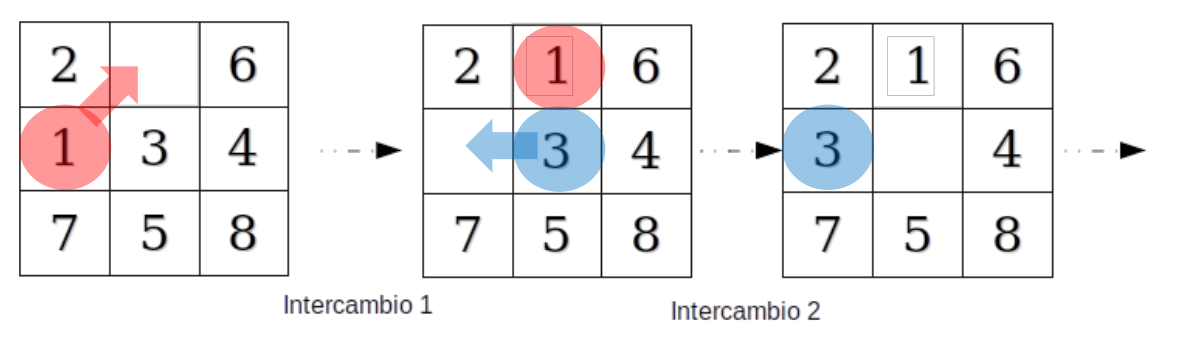


Incluimos a continuación una implementación de la distancia de Gaschnig y su integración en EightPuzzle.

**Importante**: Tras ejecutar la siguiente celda, cualquier instancia de EightPuzzle definida previamente debería reinstanciarse para que sea acorde a la nueva implementación de EightPuzzle.

In [15]:
# Redefinimos la clase EightPuzzle, pero esta vez hemos añadido la implementación de la heurística. 
# Importante: Cualquier instancia de EightPuzzle previa debería reinstanciarse para que sea acorde a la nueva implementación
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board,
    where one of the squares is a blank, trying to reach a goal configuration.
    A board state is represented as a tuple of length 9, where the element at index i 
    represents the tile number at index i, or 0 if for the empty square, e.g. the goal:
        1 2 3
        4 5 6 ==> (1, 2, 3, 4, 5, 6, 7, 8, 0)
        7 8 _
    """

    def __init__(self, initial, goal=(0, 1, 2, 3, 4, 5, 6, 7, 8)):
        assert inversions(initial) % 2 == inversions(goal) % 2 # Parity check
        self.initial, self.goal = initial, goal
    
    def actions(self, state):
        """The indexes of the squares that the blank can move to."""
        moves = ((1, 3),    (0, 2, 4),    (1, 5),
                 (0, 4, 6), (1, 3, 5, 7), (2, 4, 8),
                 (3, 7),    (4, 6, 8),    (7, 5))
        blank = state.index(0)
        return moves[blank]
    
    def result(self, state, action):
        """Swap the blank with the square numbered `action`."""
        s = list(state)
        blank = state.index(0)
        s[action], s[blank] = s[blank], s[action]
        return tuple(s)
    
    def h1(self, node):
        """The misplaced tiles heuristic."""
        return hamming_distance(node.state, self.goal)
    
    def h2(self, node):
        """The Manhattan heuristic."""
        X = (0, 1, 2, 0, 1, 2, 0, 1, 2)
        Y = (0, 0, 0, 1, 1, 1, 2, 2, 2)
        return sum(abs(X[s] - X[g]) + abs(Y[s] - Y[g])
                   for (s, g) in zip(node.state, self.goal) if s != 0)    
    
    def h(self, node): return self.h2(node)
    
     # Esta es una posible implementaciónde la distancia de Gaschnig
    def h_gaschnig_distance(self, node):        
        node_state = list(node.state)
        goal = list(self.goal)
        distance = 0
        while node_state != goal:            
            if (node_state.index(0) == goal.index (0)):                
                idxGap = node_state.index(0)
                swapIdx = 0                
                misplacedFound = False
                while (swapIdx < 9 and not misplacedFound):
                    if node_state[swapIdx] != goal[swapIdx] and node_state[swapIdx] != 0:
                        misplacedFound = True                        
                    else:
                        swapIdx = swapIdx + 1

                swapValue = node_state[swapIdx]
                node_state [idxGap] = swapValue
                node_state [swapIdx] = 0
                
            else:                            
                idxGap = node_state.index(0)
                
                swapValue = goal[idxGap]                
                swapIdx = node_state.index(swapValue)

                node_state[idxGap] = swapValue
                node_state[swapIdx] = 0                         
                
                
            distance = distance + 1

        return distance
    
# Y esto es la función que utilizando gaschnig nos permita resolver desde la función report
def astar_gaschnig(problem): return astar_search(problem, h=problem.h_gaschnig_distance)


❓ **Pregunta 4**. Compara las tres heurísticas del 8-Puzzle (`astar_search`, `astar_misplaced_tiles`, `astar_gaschnig`) y discútelas de manera justificada. Incluye la búsqueda en anchura en la comparativa. 

- 4.1) ¿Qué función heurística es más informada? ¿Cómo ha funcionado en promedio la tercera heurística en relación con las otras dos? ¿En qué proporción o orden de magnitud funciona la búsqueda con heurística mejor que sin ella? No olvides incluir el código que has tenido que desarrollar para realizar la tabla comparativa resultante. 

**Pista**: Cuando disponemos de varias funciones heurísticas que utilizan la estrategia A\*, decimos que una función es más informada que otra cuando la primera necesita expandir menos nodos que la segunda. Asumimos entonces que debido a la mayor información condificada en la función heurística, o al menos aprovechada de mejor forma, permite guiar mejor el proceso de búsqueda de tal forma que la estimación dada por la función *h* se ajusta/acerca más a la realidad del coste pendiente.

In [17]:
# Celda asociada a Pregunta 4
# Pon aquí el código para realizar la comparación 

def report(searchers, problems, verbose=True):
    """Show summary statistics for each searcher (and on each problem unless verbose is false)."""
    for searcher in searchers:
        print(searcher.__name__ + ':')
        total_counts = Counter()
        for p in problems:
            prob   = CountCalls(p)
            soln   = searcher(prob)
            counts = prob._counts; 
            counts.update(actions=len(soln), cost=soln.path_cost)
            total_counts += counts
            if verbose: report_counts(counts, str(p)[:40])
        report_counts(total_counts, 'TOTAL\n')
        report_media(total_counts,len(problems),searcher,'MEDIA\n', datos)

class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter()
        
    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)
def report_counts(counts, name):
    """Print one line of the counts report."""
    print('{:9,d} nodes |{:9,d} goal |{:5.0f} cost | {}'.format(
          counts['result'], counts['is_goal'], counts['cost'], name))
    
def report_media(counts,longitud,searcher,name, datos): 
    """Print one line of the counts report."""
    nodes = counts['result']/longitud
    is_goal = counts['is_goal']/longitud
    cost = counts['cost']/longitud
    datos.append({'heuristica':searcher.__name__,'nodes': nodes, 'is_goal': is_goal, 'cost': cost})
    
    print('{:9,f} nodes |{:9,f} goal |{:9,f} cost | {}'.format(
         nodes, is_goal , cost, name))

datos = []
   
report((astar_search, astar_misplaced_tiles, astar_gaschnig,breadth_first_search), 
       (e1, e2, e3, e4, e5, e6))

#Primero con la mejor heurística

HManh = datos[0]
HHam = datos[1]
HGas = datos[2]
Anch = datos[3]

nodesAnch = Anch['nodes']
goalAnch = Anch['is_goal']
nodesHman = HManh['nodes']
goalHman = HManh['is_goal']
print(f"Orden de magnitud de búsqueda en heurística con Manhattan frente a sin ella en nodos explorados: {nodesAnch/nodesHman}")

#Ahora se hace una media de las heurísticas para comparar con la búsqueda no informada. 

mediaHeuNodos = (HManh['nodes'] + HHam['nodes'] + HGas['nodes'])/3
print(f"Orden de magnitud de búsqueda en heurística (media) frente a sin ella en nodos explorados: {nodesAnch/mediaHeuNodos}")





astar_search:
       15 nodes |        6 goal |    5 cost | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
    3,614 nodes |    1,349 goal |   22 cost | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
    5,373 nodes |    2,010 goal |   23 cost | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
   10,832 nodes |    4,086 goal |   26 cost | EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1),
   11,669 nodes |    4,417 goal |   27 cost | EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1),
      847 nodes |      314 goal |   16 cost | EightPuzzle((1, 5, 2, 4, 0, 3, 6, 7, 8),
   32,350 nodes |   12,182 goal |  119 cost | TOTAL

5,391.666667 nodes |2,030.333333 goal |19.833333 cost | MEDIA

astar_misplaced_tiles:
       17 nodes |        7 goal |    5 cost | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
   23,407 nodes |    8,726 goal |   22 cost | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
   38,632 nodes |   14,433 goal |   23 cost | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
  124,324 nodes |   46,553 goal |   26 cost | EightPuzzle((7, 2,

## 4. Bloque P1.2


## El problema del Viajante de Comercio (VC)

El objetivo de este bloque es modelar e implementar un agente inteligente que sea capaz de resolver
el problema del VC mediante estrategias de búsqueda A*, haciendo uso de funciones de AIMA con las que te has familiarizado en el bloque anterior.


### Definición del problema

El problema del VC afecta a una persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y A es el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j (es decir, el coste para ir desde la ciudad *i* a la ciudad *j*).

Para facilitar la labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y calcula la distancia entre cualquier par de ciudades usando la fórmula del semiverseno (https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que tiene en cuenta la curvatura de la Tierra.

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [61]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades, mientras que cada una de las líneas sucesivas especifican como coordenadas GPS (latitud y longitud en grados) las coordenadas de cada ciudad.

Fíjate que las distancias en Google Maps van a ser más largas que las nuestras pues nosotros solo tenemos en cuenta la curvatura de la tierra en línea recta mientras que el servicio de mapas toma en cuenta otros aspectos relevantes sobre la existencia de carretera o vía así como otras características geográficas. 

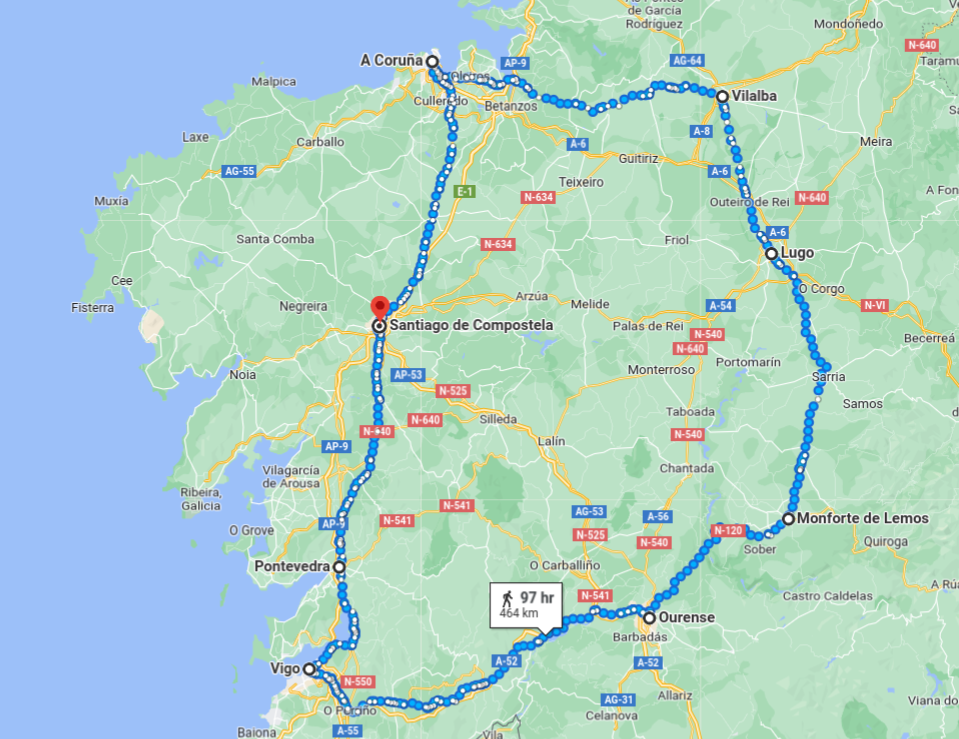

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación.

In [61]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
print (g1.nciudades)

g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))

55.88273580792048
8
119.30959564041359


### Implementación del problema VC


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber N permutaciones que cubran todo el espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (N grande) haga el problema impracticable y éste pueda beneficiarse de búsquedas informadas, que guíen inteligentemente el proceso para reducir el espacio de búsqueda y por tanto el esfuerzo computacional.

Véamos cómo podrías plantear una implementación del VC. Para hacer la explicación más manejable, supongamos que tomamos las 4 primeras ciudades de nuestro problema de las 8 ciudades gallegas.

 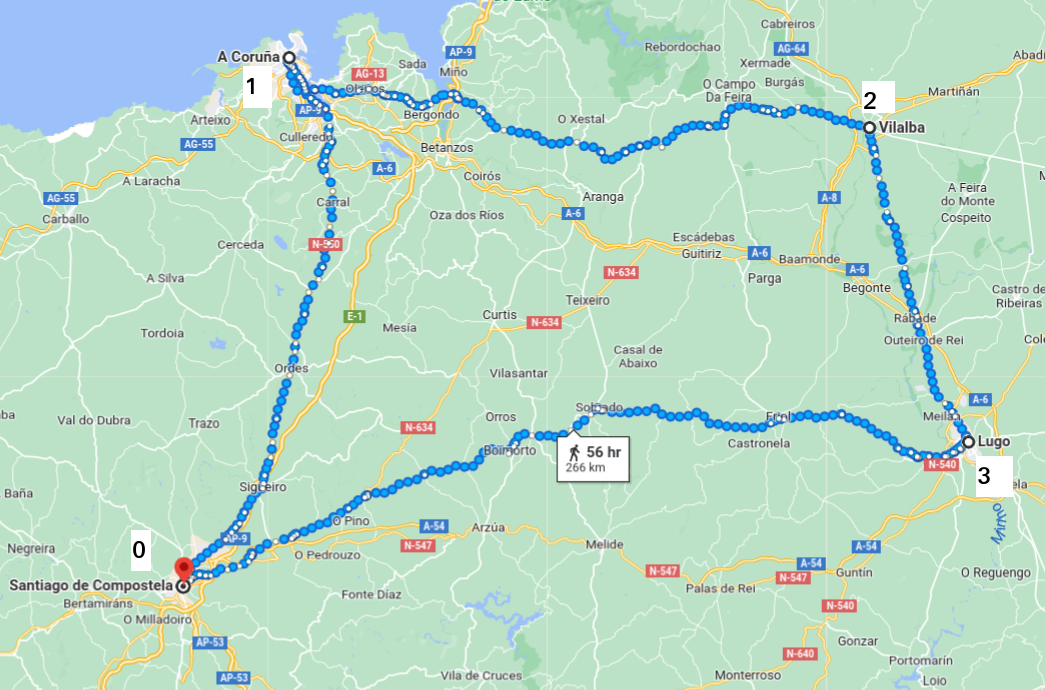


En primer lugar necesitamos determinar una representación adecuada de nuestros estados en el espacio de búsqueda. Aunque se puede hacer de varias formas, una forma razonable sería disponer de una tupla cuyos elementos serían los índices de la ciudades según el orden en que han sido visitadas. 

Por ejemplo, la tupla (0, 1, 3, 2 , 0) representaría un estado que indicaría el siguiente camino: Santiago de Compostela- A Coruña - Lugo - Villalba - Santiago de Compostela. Fíjate que dicho camino es realmente un ciclo, pues la primera y última ciudad son la misma, Santiago de Compostela, y por tanto, podría ser un estado meta. Viendo el mapa de ejemplo, sabemos que pueden haber varios estados meta, y el que sería considerado como solución óptima correspondería a la secuencia (0, 1, 2, 3, 0).

Cabe hacerse ahora algunas preguntas clave. ¿Inicialmente dónde estamos y cuántas ciudades hemos visitado? Efectivamente, de partida estaremos en la ciudad 0, y no habremos visitado ninguna otra ciudad todavía, así que podríamos representar nuestro estado inicial como (0,). 

¿Y si entonces visitamos una segunda ciudad? Pues podríamos ir a A Coruña (1), Villalba (2) o a Lugo (3), lo que daría lugar a los siguientes posibles estados sucesores (0, 1), (0, 2) o (0, 3) respectivamente. Imagina que nuestra estrategia seleccionase A Coruña como el mejor sucesor entre los siguientes posibles en el camino hacia el objetivo propuesto. En ese caso, el nuevo estado resultante sería (0, 1). A partir de este, nota que los nuevos posibles sucesores serían (0, 1, 2) y/o (0, 1, 3), fruto de considerar las otras dos ciudades que no han sido visitadas todavía. Debes fijarte que en estos casos, los estados representan la secuencia de índices mediante una tupla de tamaño creciente, de forma que se va construyendo paso a paso. Y cabe destacar que sabemos que no son estados meta porque no hemos visitado todas las ciudades y cerrado el ciclo todavía.

A continuación mostramos un árbol que representa nuestro espacio de búsqueda. Reflexiona lo que representan los nodos y los arcos. En el caso del VC, ¿dónde representarías el coste del camino? Piénsalo, e indícalo en tu respuesta a la pregunta 5 cuando expliques tu implementación.

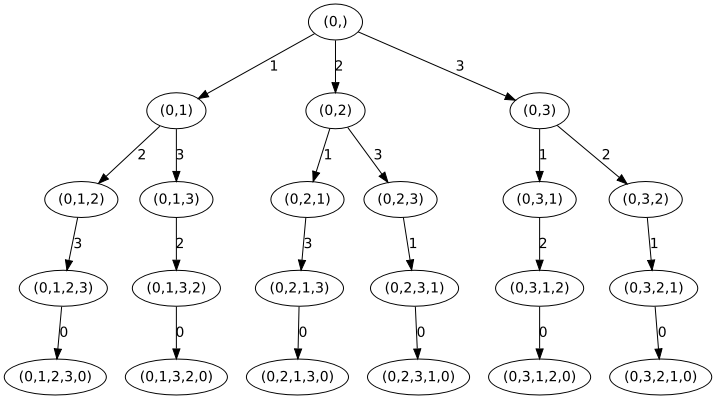

❓ **Pregunta 5**. Implementa el problema del VC siguiendo las indicaciones dadas y responde a las cuestiones planteadas.

Tu implementación `ProblemaViajanteComercio` debe extender la clase `Problem` y sobreescribir los métodos `actions, result, is_goal, action_cost` según la representación del estado discutida arriba. 
Por el momento, considera el grafo de las 8 ciudades gallegas y una implementación nula de la heurística, h=0, de forma que debería funcionar como una búsqueda de coste uniforme. 

- 5.1) Explica cómo has implementado los operadores así como el modelo de transición que gobierna la expansión o generación de sucesores de los estados en el espacio de búsqueda. Explica brevemente cuáles han sido los aspectos clave en tu implementación de `actions, result, is_goal, action_cost`. 


In [31]:
# Celda asociada a Pregunta 5
# Completa la implementación

class ProblemaViajanteComercio(Problem):
    """ Problema Viajante de Comercio
    """    
    def __init__(self,inicial,file,goal=None,**kwds): 
        #Se lee el archivo que se le pase con las coordenadas
        self.localizaciones = Localizaciones(file)
        self.file=file
        self.goal = goal
        self.initial = inicial
        
        #self.__dict__.update(initial=initial, goal=goal, **kwds)
    def __str__(self):
         return 'ProblemaViajanteComercio({})'.format(self.localizaciones.filename) 
    
    def actions(self, state):
        """devuelve la lista de ciudades no visitadas como acciones potenciales."""  
       
        # ToDo
        acciones = [] #Acciones posibles
        for i in range(self.localizaciones.nciudades): 
            if i not in state: #Si la ciudad no está en el estado actual, es un movimiento posible
                acciones.append(i)
        #Si están todas, hay que comprobarlo, y meter la última
        if len(acciones) == 0: 
            acciones.append(self.initial[0])
            

        return tuple(acciones)
    
    def result(self, state, action):
        """produce el nuevo estado al anadir la accion seleccionada"""                                      
        # ToDo       
        l = list(state)
        l.append(action)
        nuevo_estado = tuple(l)
        
        return nuevo_estado
    
    def is_goal(self, state):        
        # Si el tamaño es de el número ciudades, +1, porque se vuelve a la ciudad inicial 
        #cuando se han recorrido todas. 
        if len(state) == (self.localizaciones.nciudades+1): 
            return True
        return False
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""        
        # ToDo
        #Se calcula la distancia entre las últimas ciudades de los vectores s y s1
        return self.localizaciones.distancia(s[-1],s1[-1])
    
    def h(self, node): 
        # ToDo
        return 0


    def h1(self,node): 
        #Para ello vemos las posibles acciones y la distnacia mínima, con un bucle

        posibles_acciones = self.actions(node.state)
        for i in range(len(posibles_acciones)): 
            aux = self.localizaciones.distancia(node.state[-1], posibles_acciones[i])
            if i == 0: 
                menor_distancia = aux
            else: 
                menor_distancia = min(menor_distancia,aux)
        return menor_distancia

    def h2(self,node): 
        #Para ello vemos las posibles acciones y la distnacia máxima, con un bucle

        posibles_acciones = self.actions(node.state)
        for i in range(len(posibles_acciones)): 
            aux = self.localizaciones.distancia(node.state[-1], posibles_acciones[i])
            if i == 0: 
                mayor_distancia = aux
            else: 
                mayor_distancia = max(mayor_distancia,aux)
        return mayor_distancia


    def h3(self,node): 
        #Para ello vemos las posibles acciones y la distnacia media

        posibles_acciones = self.actions(node.state)
        aux = 0
        for i in range(len(posibles_acciones)): 
            aux += self.localizaciones.distancia(node.state[-1], posibles_acciones[i])
        return aux/len(posibles_acciones)





### Implementación de heurísticas para VC

La elección de heurísticas que estimen el coste de alcanzar un estado objetivo a partir de un estado dado es crucial para que la estrategia de búsqueda A* sea informada/guiada con mayor eficacia. Recuerda que cuanta más precisa sea la estimación que efectue la función h (es decir, más cercana al coste real), más informada será la búsqueda. Es conveniente que la heurística subestime el coste real para asegurar que la estrategia sigue siendo admisible, y por tanto no descarta estados que puedan conducir a la solución óptima.

❓ **Pregunta 6**. Realiza las implementaciones necesarias para incorporar heurísticas a la implementación A* del VC y responde a las siguientes cuestiones.

- 6.1) Diseña e implementa las siguientes funciones heurísticas que se proponen para una estrategia de búsqueda A* explicando brevemente cómo las has implementado:
    - h1 (n) = **vecino más próximo**: considera como coste estimado la distancia al vecino más próximo que no haya sido visitado todavía, persiguiendo de esta forma que se produzca el mínimo incremento en longitud al añadir la ciudad al camino. Da prioridad al destino más cercano de entre los pendientes de visitar.
    - h2 (n) = **vecino más lejano**: considera como coste estimado la distancia al vecino más lejano que no haya sido visitado todavía, teniendo en cuenta el coste en que se podría incurrir luego por esos nodos más lejanos pendientes. Da prioridad al destino más lejano de entre los pendientes de visitar.
    - h3 (n) = **distancias medias**: considera realizar una estimación calculada como la distancia media a los nodos pendientes de visitar. Da prioridad al nodo no visitado tal que la distancia media al resto de nodos sea la menor posible.

- 6.2) Utiliza el grafo de las 8 ciudades gallegas como datos de entrada para comprobar la correctitud de tu implementación. ¿Cuál es el la distancia de la solución óptima? Muestra el resultado de la ejecución A* con las heurísticas implementadas.

- 6.3) Para cargar varias instancias del problema como entrada, utiliza algunos ficheros del directorio `./data`, y lleva a cabo la comparación de las heurísticas implementadas. Explica y justifica los resultados obtenidos. 

**Nota:** Ten en cuenta que para extraer conclusiones científicamente válidas puede no ser suficiente utilizar una única instacia del problema como entrada.

In [40]:
# Celda asociada a las Preguntas 6.1, 6.2 y 6.3

#IMPORTANTE, pongo las implementaciones de h1, h2 y h3 arriba, ya que tal y como está implementada best_first_search, 
#solo lo llama con un argumento, por lo tanto hace uso de self, y tiene que incluirse en la casle del ProblemaViajanteComercio.


#Definimos las funciones que van a usar las heurísticas 

def astar_search_h1(problem): 
    return astar_search(problem,h=problem.h1)

def astar_search_h2(problem): 
    return astar_search(problem,h=problem.h2)

def astar_search_h3(problem): 
    return astar_search(problem,h=problem.h3)

#Comprobación de la solución óptima usando la búsqueda en anchura

problema = ProblemaViajanteComercio((0,),'./data/grafo8cidades.txt')

print(f'Resolver el problema del VC para hallar la solución óptima')
Opt = breadth_first_search(problema)
print ("Nodo solución: ", Opt)

print ('sol1: Solución optima')
print (f'Coste del camino: {Opt.path_cost:f}')
print (f'Estado solución: {Opt.state:}')
print (f'Lista de acciones: {path_actions(Opt)}')
print (f'Numero de acciones en el camino: {len(path_actions(Opt))}')
print (f'Lista de estados:')
print (path_states(Opt))


#A continuación, veamos la implementación mediante el ejemplo de las 8 ciudades gallegas. 
#Primero sin heurística

problema = ProblemaViajanteComercio((0,),'./data/grafo8cidades.txt')

print(f'Resolver el problema del VC sin heurística')
sol0 = astar_search(problema)
print ("Nodo solución: ", sol0)

print ('sol1: Sin heurística')
print (f'Coste del camino: {sol0.path_cost:f}')
print (f'Estado solución: {sol0.state:}')
print (f'Lista de acciones: {path_actions(sol0)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol0))}')
print (f'Lista de estados:')
print (path_states(sol0))

#Ahora veamos con la primera heurística


print(f'Resolver el problema del VC con h1')
sol1 = astar_search_h1(problema)
print ("Nodo solución: ", sol1)

print ('sol1: con h1')
print (f'Coste del camino: {sol1.path_cost:f}')
print (f'Estado solución: {sol1.state:}')
print (f'Lista de acciones: {path_actions(sol1)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol1))}')
print (f'Lista de estados:')
print (path_states(sol1))


#Ahora veamos con la segunda heurística


print(f'Resolver el problema del VC con h2')
sol2 = astar_search_h2(problema)
print ("Nodo solución: ", sol2)

print ('sol1: con h2')
print (f'Coste del camino: {sol2.path_cost:f}')
print (f'Estado solución: {sol2.state:}')
print (f'Lista de acciones: {path_actions(sol2)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol2))}')
print (f'Lista de estados:')
print (path_states(sol2))

#Ahora veamos con la tercera heurística


print(f'Resolver el problema del VC con h3')
sol3 = astar_search_h2(problema )
print ("Nodo solución: ", sol3)

print ('sol1: con h3')
print (f'Coste del camino: {sol3.path_cost:f}')
print (f'Estado solución: {sol3.state:}')
print (f'Lista de acciones: {path_actions(sol3)}')
print (f'Numero de acciones en el camino: {len(path_actions(sol3))}')
print (f'Lista de estados:')
print (path_states(sol3))

#Ahora se va a hacer una comparaciń con el report, con varios datos de la carpeta ./data

problema1 = ProblemaViajanteComercio((0,),'./data/grafos10_10/grafo_1.txt')
problema2 = ProblemaViajanteComercio((0,),'./data/grafos10_10/grafo_2.txt')
problema3 = ProblemaViajanteComercio((0,),'./data/grafos10_10/grafo_3.txt')
problema4 = ProblemaViajanteComercio((0,),'./data/grafos10_10/grafo_4.txt')


problema5 = ProblemaViajanteComercio((0,),'./data/grafos10_20/grafo_10.txt')
problema6 = ProblemaViajanteComercio((0,),'./data/grafos10_20/grafo_15.txt')
problema7 = ProblemaViajanteComercio((0,),'./data/grafos11_10/grafo_6.txt')
problema8 = ProblemaViajanteComercio((0,),'./data/grafos12_10/grafo_8.txt')

def report(searchers, problems, verbose=True):
    """Show summary statistics for each searcher (and on each problem unless verbose is false)."""
    for searcher in searchers:
        print(searcher.__name__ + ':')
        total_counts = Counter()
        for p in problems:
            prob   = CountCalls(p)
            soln   = searcher(prob)
            counts = prob._counts; 
            counts.update(actions=len(soln), cost=soln.path_cost)
            total_counts += counts
            if verbose: report_counts(counts, str(p)[:80])
        report_counts(total_counts, 'TOTAL\n')
        report_media(total_counts,len(problems),searcher,'MEDIA\n')
        
class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter()
        
    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)
def report_counts(counts, name):
    """Print one line of the counts report."""
    print('{:9,d} nodes |{:9,d} goal |{:9,f} cost | {}'.format(
          counts['result'], counts['is_goal'], counts['cost'], name))
    
def report_media(counts,longitud,searcher,name): 
    """Print one line of the counts report."""
    nodes = counts['result']/longitud
    is_goal = counts['is_goal']/longitud
    cost = counts['cost']/longitud
    
    print('{:9,f} nodes |{:9,f} goal |{:9,f} cost | {}'.format(
         nodes, is_goal , cost, name))
   



report((astar_search, astar_search_h1, astar_search_h2,astar_search_h3), 
      (problema,problema1,problema2,problema3,problema4,problema5,problema6,problema7, problema8))




Resolver el problema del VC para hallar la solución óptima
Nodo solución:  <(0, 1, 2, 3, 4, 5, 6, 7, 0)>
sol1: Solución optima
Coste del camino: 381.669962
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 0)
Lista de acciones: [1, 2, 3, 4, 5, 6, 7, 0]
Numero de acciones en el camino: 8
Lista de estados:
[(0,), (0, 1), (0, 1, 2), (0, 1, 2, 3), (0, 1, 2, 3, 4), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6, 7), (0, 1, 2, 3, 4, 5, 6, 7, 0)]
Resolver el problema del VC sin heurística
Nodo solución:  <(0, 1, 2, 3, 4, 5, 6, 7, 0)>
sol1: Sin heurística
Coste del camino: 381.669962
Estado solución: (0, 1, 2, 3, 4, 5, 6, 7, 0)
Lista de acciones: [1, 2, 3, 4, 5, 6, 7, 0]
Numero de acciones en el camino: 8
Lista de estados:
[(0,), (0, 1), (0, 1, 2), (0, 1, 2, 3), (0, 1, 2, 3, 4), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6, 7), (0, 1, 2, 3, 4, 5, 6, 7, 0)]
Resolver el problema del VC con h1
Nodo solución:  <(0, 7, 6, 5, 4, 3, 2, 1, 0)>
sol1: con h1
Coste del camino:

## 5. Evaluación

La evaluación de esta primera práctica consta de dos items de calificación, cada uno evaluado sobre 10 puntos y debidamente normalizados:

* **Corrección y claridad de las respuestas al cuestionario** (30%; 3/10). El cuestionario incluye 6 preguntas con sus correspondientes subapartados (ver detalles al final de este Jupyter Notebook).

* **Calificación en el Test1 a realizar una vez hecha la entrega** (70%; 7/10). Este Test se realizará al comienzo de la sesión de prácticas inmediatamente siguiente a la Entrega, con el fin de evaluar la compresión de la entrega realizada. Inlcuirá 4 preguntas (2 preguntas sobre el Bloque P1.1 y 2 preguntas sobre el Bloque P1.2) que pueden requerir ejecutar el código de la entrega con diferentes inputs. Todas las preguntas valen lo mismo, 2.5 puntos cada una.

Así, la nota final asociada a la Práctica 1 será la suma de ambas calificaciones, pudiendo alcanzarse un máximo de 10 puntos, que se agregará a las calificaciones obtenidas en el resto de prácticas sólo si es mayor o igual a 3. Como a lo largo del curso habrá 5 entregas, todas con el mismo peso, esta calificación representa el 20% de la nota final de la parte práctica de la asignatura.

**************************************************************

# Respuestas al cuestionario (10 puntos)

**RECUERDA:** No te olvides de escribir tu nombre y apellidos en la segunda celda del presente documento.

**Incluye las celdas que consideres oportunas para que sea legible.**

***==================== Pregunta 1 ====================*** *(1 punto)*


**Pregunta 1.1**
breadth_first_search realiza una búsqueda en anchura, explorando primero los nodos menos profundos, mientras que el best_first_search realiza una búsqueda en profundidad del mejor nodo en ese momento, según el valor del f(n) (Coste de la solución. En ambos se realiza una comprobación de si el problema está resuelto inicialmente. 

En el de búsqueda en anchura, se crea una pila FIFO con una lista formada por un único nodo inicial, y el alcanzado como el inicio del problema. Mientras haya datos en la pila, se extraeran los nodos de forma que implementa la FIFO, de modo que se cumple la búsqueda en anchura. Luego expande el nodo, y se mira si cada hijo es el objetivo. Si lo es, lo devuelve, y si no, ve si ya está en la lista de alcanzados, y si no los mete en la primera posición de la FIFO para seguir posteriormente en anchura. 

Por otro lado, en el de búsqueda en profundidad, se utiliza una cola de prioridad, utilizando la función de prioridad f(). En este caso, la lista de alcanzados es un diccionario, con la clave el nodo inicial, y el valor el nodo en el que se encuentra. Por lo que, saca un elemento de la cola de priordad según la función f(), y ve si es el objetivo. Si no lo es, lo que hace es expandir el nodo, viendo sus hijos, y para cada uno de ellos, lo mete en la cola de prioridad, si el estado aú no ha sido explorado, o si el coste del hijo es menor que el que había en el valor del alcanzado. Además, actualiza el valor del alcanzado por el hijo, cada vez que se cumple una de las dos condiciones. De este modo, se meten los posibles hijos óptimos en la cola de prioridad, y en el siguiente paso se extrae el mejor, según la función f(), hasta encontrar la solución, logrando así la búsqueda en profundidad.  


**Pregunta 1.2**

La función g(n) indica el coste acumulado desde el inicio hasta el momento actual


***==================== Pregunta 2 ====================*** *(1 punto)*


**Pregunta 2.1**
Para cada estado se utiliza una tupla, similar a una lista, pero que no se puede modificar. El estado inicial está representado por la tupla (1, 2, 3, 4, 5, 6, 7, 8, 0). El estado por lo tanto se representa como una tupla, situando un cero en el espacio en blanco, o utilizando la clase board, que se encarga de represetnarlo como si fuese el tablero, indicando una _ en el espacio en blanco.

**Pregunta 2.2**
El agente inteligente puede moverse en varias direcciones según en donde esté el espacio en blanco. Esta secuencia de movimientos posibles se define con una tupla de tuplas llamada moves, en la función actions. En cada posición de la tupla, se indican las posiciones a las que se podrían mover los números, sin poder moverlos en diagonal, solo de arriba a abajo o de izquierda a derecha. Cuando se empieza el algoritmo A*, se invoca a la búsqueda en profundidad definida anteriormente, con la heurística de Manhattan como h(n), para determinar cual es el movimiento óptimo. El algoritmo se encarga de buscar en cada movimiento la opción óptima según la heurística, y realiza los movimeintos con la función result de EightPuzzle. Dicha función convierte cada estado en una lista mutable nueva, para no borrar el anterior estado, y realiza el movimiento que se considera óptimo en ese caso, utilizando la función actions. Visto desde el punto de vista de la explicación de Problem, cada movimiento genera un hijo distinto, y se evalúa el coste de cada uno según la heurística, para tomar la decisión de hacer uno u otro. 

**Pregunta 2.3**
El coste de la solución obtenida se almacena en la variable path-cost de la clase Node. Conforme se van creando los nodos hijos, esta variable se va incrementando, teniendo en cuenta el acumulado y el del propio nodo. Las acciones realizadas se almacenan en cada nodo, individualmente, y luego se recuperan con la función path_actions, que recorre los nodos desde el último hasta la raíz, y se va imprimiendo cada acción que se realizó en cada momento. 

**Pregunta 2.4**
He probado e7 = EightPuzzle((5, 0, 2, 4, 7, 3, 1, 8, 6)). 
El coste de camino con A* es de 17, al igual que con breadth_first_search 

***==================== Pregunta 3 ====================*** *(1.5 puntos)*


**Pregunta 3.1**

El dato de Nodes es el número de veces que se ha accedido a la información de un nodo en la búsqueda de la solución. Esto se consigue utilizando la clase Counter(), y sumando uno cada vez que accede al nodo. Este valor depende del algoritmo que se use, y de cómo sea su implementación en cuánto a accesos.  Goal indica el nodo generado en el que se ha hallado la solución, y Cost es la profundidad del árbol de búsqueda. 

**Pregunta 3.2**
En las búsquedas no informadas, tenemos varias desventajas dependiendo de si es una búsqueda en anchura o en profundidad. Por un lado, en anchura se requiere muchos recursos computacionales, ya que la complejidad espacial y temporal es muy elevada debido a la exploración de todos los nodos horizontalmente, hasta llegar a la solución. Esto se puede ver claramente en el breadth_first_search, en el que se exploran una cantidad de nodos muy elevada hasta llegar a la solución. En profundidad también supone un problema, utilizando unicamente la función g(n), como se puede observar, ya que se exploran una cantidad muy elevada de nodos hasta encontrar la solución. Cabe destacar que no siempre ocurre este fenómeno, y puede llegar a ser mejor que una búsqueda informada. 



**Pregunta 3.3**

Las estrategias de búsqueda en anchura, junto con el algoritmo A* y el uniform_cost_search, son las estrategias que ofrecen una solución óptima. Si cambiamos las instancias, seguirían encontrando la solución óptima, tanto la búsqueda en anchura, como el A* y el uniform_cost_search (este último es una variante del A* no informada, pero sigue encontrando la óptima).


**Pregunta 3.4**

breadth_first_search ha realizado una búsqueda en anchura no informada, por lo que el número de nodos explorados es muy elevado, hasta encontrar la solución óptima, ya que es la más cercana al nodo raíz. El rendimiento es bueno en cuanto a la búsqueda de la solución óptima, pero tiene un alto coste computacional. 

depth_limited_search realiza una búsqueda en profundidad, con un límite de profundidad de 10. Solo en los casos en los que no se supera este límite, muestra el coste de la solución. En el resto muestra el número de nodos explorados, y marca como solución el nodo inmediatamente posterior, por su implementación. El rendimiento es bajo, ya que la búsqueda de la solución está determinada por una cifra, y en el caso de e3, en el que la encuentra, accede a más nodos que en la búsqueda en anchura, por lo que se podría decir que es peor estrategia. 

greedy_bfs realiza una búsqueda en profundidad informada, según la función h(n), distancia que hay hasta la solución. El coste de la solución es más elevado que en el caso de búsqueda en anchura, pero por otro lado, se realiza un acceso a un menor número de nodos, de forma significativa. Por lo que el algoritmo es eficiente en cuanto a coste computacional, pero no en cuanto a búsqueda de la solución óptima. 

uniform_cost_search: en este caso se realiza una búsqueda en profundidad, eligiendo el nodo con el camino más corto desde la raíz g(n), sin tener en cuenta la distancia posterior, por lo que es una búsqueda no informada. En este caso se encuentra las soluciones óptimas, pero por otro lado se accede a un número mayor de nodos, ya que el algoritmo accede al nodo más de una vez en cada iteracción, debido a su implementación. Por lo que podemos decir que es una estrategia peor computacionalmente que la de anchura, aunque si que encuentra la solución óptima. 


astar_search: es la estrategia A*, que tiene en cuenta tanto la función f(n) como g(n) para calcular la heurística. Como se ha comentado previamente, se encuentra la solución óptima para este problema, pero se consumen muchos menos recursos computacionales que en la anchura o en la búsqueda uniforme. 

weighted_astar_search: es una variante de A*, dándole más peso a la heurística f(n) a la hora de elegir el nodo. Vemos las diferencias en cuanto al anterior, ya que se accede a un número menor de nodos, por lo que es más eficiente computacionalmente, pero no se encuentra la solución óptima. La elección entre un algoritmo u otro depende seǵun lo que se quiera priorizar. 

Por último, cabe destacar que los criterior para decidir cuál es la mejor estrategia varían según los requerimientos, por lo que no se puede concluír que hay una mejor que otras. 



**Pregunta 3.5**
Utiliza la función h(n) dada por la clase EitghtPuzzle, que en este caso es la distancia de Manhattan, que mide el número de movimientos que hacen falta para que cada casilla esté en su posición. 



***==================== Pregunta 4 ====================*** *(1.5 puntos)*

**Pregunta 4.1**
Para la comparación informada, no se va a tener en cuenta la búsqueda en anchura (breadth_first_search), ya que es no informada. Vemos que la búsqueda A* con la distnacia manhattan es la más informada, ya que es la que necesita despleegar un menor número de nodos. Vemos que la tercera heurística encuentra la solución, en el mismo coste que con la distancia manhattan y que con la hamming, por lo que que todos los casos se encuentra la solución óptima en profundidad del árbol de búsqueda. Vemos que en cuanto a media, la tercera heurística es mejor que la búsqueda Hamming, explora menos nodos, pero sin embargo es peor que la búsqueda con Manhattan, ya que explora más. Aunque en todos los casos la encuentra en el mismo nivel de búsqueda. 

Para hallar el orden de magnitud de una búsqueda no informada respecto a una búsqueda con heurística, primero se compara con la mejor de las heurísticas (astar_search que usar búsqueda con distnacia Manhattan). Con estos datos, la búsqueda en nodos 
explorados mejora en 39.04, es decir, en un orden de magnitud respecto a 1. 
Por otro lado, la búsqueda no informada respecto a la media de las heurísticas, mejora en 5.61, también en un orden de magnitud. 


***==================== Pregunta 5 ====================*** *(3 puntos)*

**Pregunta 5.1**
Para la implementación del problema del viajante, he implementado las siguientes funciones de la clase problem. 

En primer lugar, en el init, he realizado un pequeño cambio, Se le pasa el estado inicial, siendo de la forma (0,), (1,) etc, dependiendo de la ciudad en la que se empiece. Luego se le pasa también el archivo del cual va a coger los datos de las ciudades, inicializando la variable localizaciones de la clase. Y el goal se inicializa a goal, para evitar datos en el report. 

Posteriormente modifico la función __str__, para que escriba correctamente el problema que se está analizando en el report, indicando el estado inicial y el archivo de entrada. 

El método actions, se basa en ver qué ciudades no están en el estado actual, y metiéndolas en las posibles acciones si no lo están. Se hace la comprobación de ver si el array de acciones es 0, ya que si es este caso, significa que solo tiene que volver a la ciudad inicial, porque ya las ha recorrido todas. Por último se convierte el array acciones a una tupla, ya que se trabaja con tuplas en los algoritmos. 
El método result, convierte el estado actual a una lista, luego le añade la acción a realizar, y devuelve el nuevo estado como una tupla. 

Para el método is_goal, se comprueba si la longitud de la tupla del estado actual es igual al número de ciudades + 1 (ya que tiene que volver a la inicial), y si es así, es que ha alcanzado el objetivo. 

Para el action_cost, se devuelve únicamente la distancia entre los dos últimos elemetnos de las tuplas de estados pasadas, utilizando el método existente en la clase localizaciones. Por lo tanto, la distancia entre dos nodos se representa mediantea este método


***==================== Pregunta 6 ====================*** *(2 puntos)*


**Pregunta 6.1**
Para este apartado, he incluído las definiciones de las heurísticas en la clase del problema, ya que a la hora de utilizar el algoritmo astar_search, está implementado de forma que solo se le puede pasar el nodo, y que la h() utilice el self, por lo que se debe incluír en la clase ProblemaViajanteComercio. 

Para la primera heurística (distancia al vecino más próximo), primero se guardan las posibles acciones a realizar, según la ciudad en la que se encuentra el estado, y las que ya se han visitado. Luego se comprueba cual es la distnacia mínima con todas las posibles acciones, y se retorna ese valor. 

Para la segunda heurística, se realiza un procedimiento similar a la anterior, pero cogiendo el máximo de las distancias. 

Y para la tercera, se hace la media de las distancias, sumando el valor de todas las posibles, y dividiendo entre la longitud de posibles_acciones. 

**Pregunta 6.2**


Para el cáculo de la solución óptima en cuanto a distancia, se ha utilizado la búsqueda en anchura, ya que como se ha visto anteriormente, porporcina la solución de coste menor, a costa de explorar los nodos horizontalmente. Este valor es de 381.67. El resultado de ejecutar el problema con las 3 heurísticas implementadas es: 

Resolver el problema del VC con h1
	Nodo solución:  <(0, 7, 6, 5, 4, 3, 2, 1, 0)>
	sol1: con h1
	Coste del camino: 381.669962
	Estado solución: (0, 7, 6, 5, 4, 3, 2, 1, 0)
	Lista de acciones: [7, 6, 5, 4, 3, 2, 1, 0]
	Numero de acciones en el camino: 8
	Lista de estados:
	[(0,), (0, 7), (0, 7, 6), (0, 7, 6, 5), (0, 7, 6, 5, 4), (0, 7, 6, 5, 4, 3), (0, 7, 6, 5, 4, 3, 2), (0, 7, 6, 5, 4, 
	3, 2, 1), (0, 7, 6, 5, 4, 3, 2, 1, 0)]
	
	
Resolver el problema del VC con h2
	Nodo solución:  <(0, 7, 6, 5, 4, 3, 2, 1, 0)>
	sol1: con h2
	Coste del camino: 381.669962
	Estado solución: (0, 7, 6, 5, 4, 3, 2, 1, 0)
	Lista de acciones: [7, 6, 5, 4, 3, 2, 1, 0]
	Numero de acciones en el camino: 8
	Lista de estados:
	[(0,), (0, 7), (0, 7, 6), (0, 7, 6, 5), (0, 7, 6, 5, 4), (0, 7, 6, 5, 4, 3), (0, 7, 6, 5, 4, 3, 2), (0, 7, 6, 5, 4, 	
	3, 2, 1), (0, 7, 6, 5, 4, 3, 2, 1, 0)]
	
	
Resolver el problema del VC con h3
	Nodo solución:  <(0, 7, 6, 5, 4, 3, 2, 1, 0)>
	sol1: con h3
	Coste del camino: 381.669962
	Estado solución: (0, 7, 6, 5, 4, 3, 2, 1, 0)
	Lista de acciones: [7, 6, 5, 4, 3, 2, 1, 0]
	Numero de acciones en el camino: 8
	Lista de estados:
	[(0,), (0, 7), (0, 7, 6), (0, 7, 6, 5), (0, 7, 6, 5, 4), (0, 7, 6, 5, 4, 3), (0, 7, 6, 5, 4, 3, 2), (0, 7, 6, 5, 4, 
	3, 2, 1), (0, 7, 6, 5, 4, 3, 2, 1, 0)]








**Pregunta 6.3**
Como se puede observar, en todos los casos se halla la solución con el mismo coste (distancia total),  la solución óptima, ya que el algoritmo A* encuentra siempre la solución óptima. Donde vemos gran diferencia es en el número de nodos generado. Para el análisis de los datos se ha realizado la media, como en uno de los apartados anteriores, y se ve como la segunda heurística es la mejor en cuanto a nodos generados, ya que genera aproximadamente la mitad con respecto a h3, y aproximadamente un tercio respecto a h1. Por lo tanto, podemos concluír que h2 es una heurística mejor informada, y que por lo tanto es la mejor elección para el problema del Viajante Comercio. 


**************************************************************